In [29]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

    
df.dropna(inplace=True)
df = df.reset_index()[df.columns]
#print (df.isnull().sum())
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

df["tenure"]=df["tenure"].map(tenure_lab)'''


#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    #print ("Feature", c_n,"has", unique_cat,"unique categories")


X=df.drop('Churn',1)
Y=df.Churn

X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]
'''todummy_list.remove('tenure')
num_cols.insert(3,'tenure')'''
X_org=X.copy()

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)
    
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
Y= le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


from sklearn.preprocessing import StandardScaler
# Fitting parameters for scaling x_train for the numerical columns 
std = StandardScaler().fit(x_train[num_cols])
#Transforming the the original data
x_train_transformed=std.transform(x_train[num_cols])
x_train_transformed_df = pd.DataFrame(x_train_transformed,columns=num_cols)
x_train=x_train.drop(num_cols,1)
x_train=pd.concat([x_train.reset_index(drop=True),x_train_transformed_df.reset_index(drop=True) ],axis=1)

#Transforming the the test data's numerical with x_train scaled parameters
x_test_transformed=std.transform(x_test[num_cols])
x_test_transformed_df = pd.DataFrame(x_test_transformed,columns=num_cols)
x_test=x_test.drop(num_cols,1)
x_test=pd.concat([x_test.reset_index(drop=True),x_test_transformed_df .reset_index(drop=True) ],axis=1)

std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)


In [30]:
print(num_cols)
print(todummy_list)
x_train.shape

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


(5625, 41)

In [31]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
   

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    


    import matplotlib.pyplot as plt
    import seaborn as sns
        
    cm = metrics.confusion_matrix(y_test, predictions)
    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


		-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------



              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.54      0.60       369

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



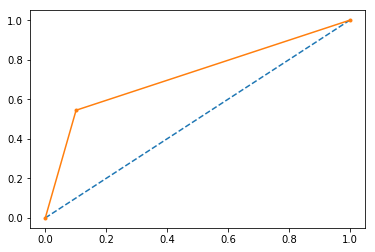

AUC: 0.722


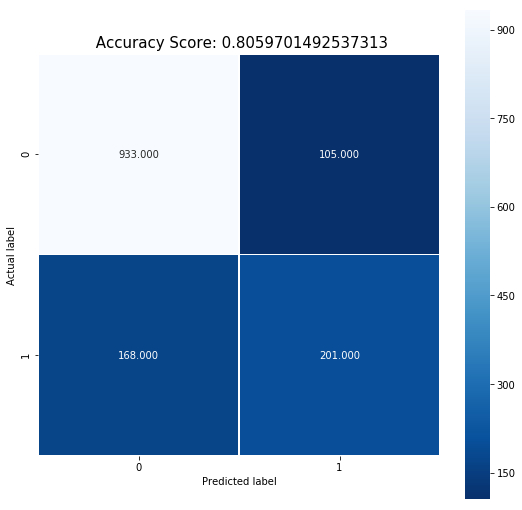

In [32]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_WO_Feature_selection}---------------------------------"""

print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)


roc_plot(m,x_test,y_test,predictions)

		-------------------LOGISTIC REGRESSION_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7153828649448173 and tpr is [0.         0.52941176 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7260780521105928 and tpr is [0.         0.55080214 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7187962225509159 and tpr is [0.         0.54010695 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7532230651245699 and tpr is [0.         0.61497326 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6897877544252373 and tpr is [0.         0.49197861 1.        ]
 ROC_AUC FOR FOLD  6 is 0.7211375036272437 and tpr is [0.         0.55080214 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7398540811673507 and tpr is [0.         0.58823529 1.        ]
 ROC_AUC FOR FOLD  8 is 0.7325322306512458 and tpr is [0.         0.55614973 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7184637068357999 and tpr is [0.         0.54545455 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7176794198549639 and tpr is [0.         0.53225806 1.        ]


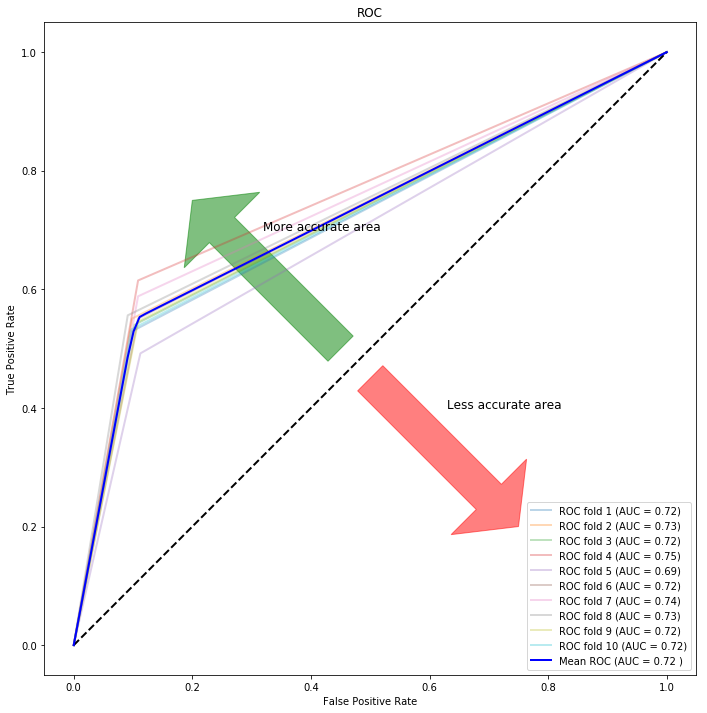

In [33]:
print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection_k_folds----------------\n\n\n')

from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7293144208037825
 ROC_AUC FOR FOLD  2 is 0.7025932953826691
 ROC_AUC FOR FOLD  3 is 0.725763075400099
 ROC_AUC FOR FOLD  4 is 0.707469172602052
 ROC_AUC FOR FOLD  5 is 0.7451292042657917
 ROC_AUC FOR FOLD  6 is 0.6890500778624703
 ROC_AUC FOR FOLD  7 is 0.6900291836384351
 ROC_AUC FOR FOLD  8 is 0.7264387271496276
 ROC_AUC FOR FOLD  9 is 0.7423624595469256
 ROC_AUC FOR FOLD  10 is 0.7120752810407983


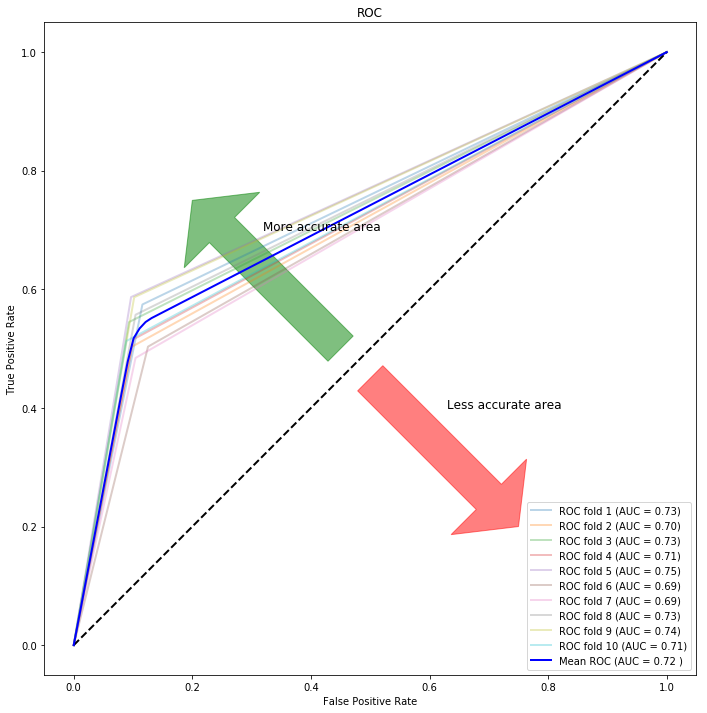

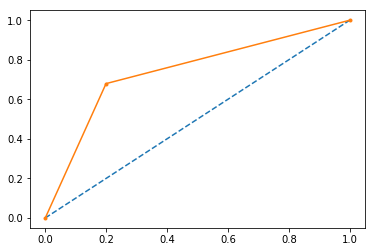

AUC: 0.740


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001D8D3EB4588>>
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\xgboost\core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


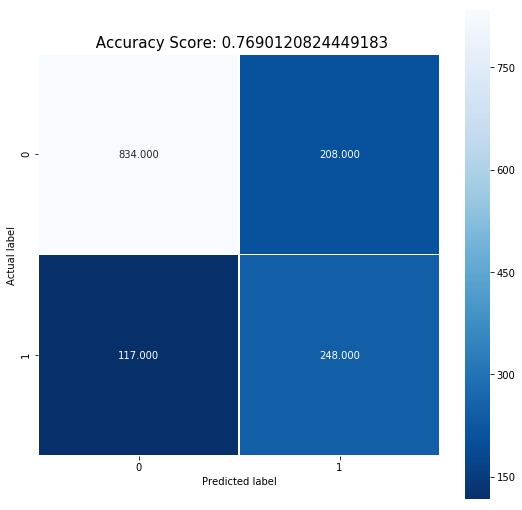

In [34]:
print("<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->")

from sklearn.model_selection import train_test_split

x_train_eighty, x_test_twenty, y_train_eighty, y_test_twenty = train_test_split(x_kf, Y, test_size=0.20, random_state=20)

# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_train_eighty, y_train_eighty)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_train_eighty,y_train_eighty ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
pred_test=m.predict(x_test_twenty)
roc_plot(m,x_test_twenty,y_test_twenty,pred_test)



		-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_HoldOut----------------



              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1038
           1       0.48      0.78      0.60       369

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



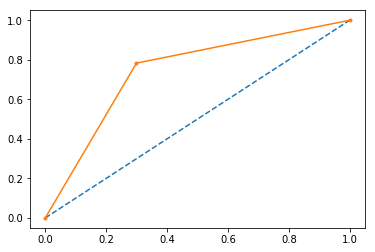

AUC: 0.742


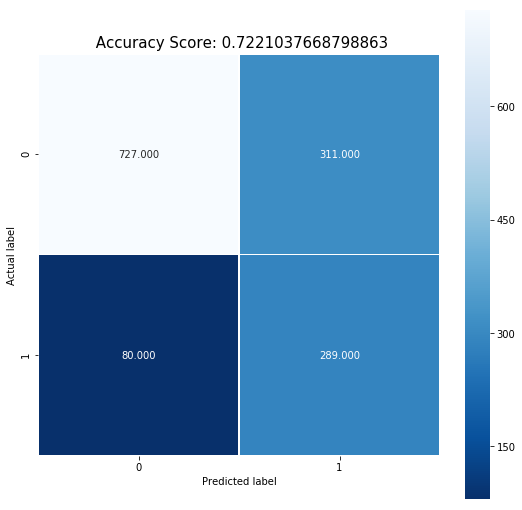

In [35]:
print ('\t\t-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_HoldOut----------------\n\n\n')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb_ho=GaussianNB()
m=gnb_ho.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

roc_plot(m,x_test,y_test,predictions)

		-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7681761292524747 and tpr is [0.        0.8342246 1.       ]
 ROC_AUC FOR FOLD  2 is 0.7598702924109683 and tpr is [0.         0.80213904 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7545795881215156 and tpr is [0.         0.81283422 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7683175807320815 and tpr is [0.         0.80213904 1.        ]
 ROC_AUC FOR FOLD  5 is 0.7812202047838162 and tpr is [0.         0.83957219 1.        ]
 ROC_AUC FOR FOLD  6 is 0.7125098453757824 and tpr is [0.        0.7486631 1.       ]
 ROC_AUC FOR FOLD  7 is 0.7639752518343489 and tpr is [0.         0.81283422 1.        ]
 ROC_AUC FOR FOLD  8 is 0.7401442606640964 and tpr is [0.         0.75935829 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7321591427268581 and tpr is [0.         0.76470588 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7336834208552137 and tpr is [0.         0.75806452 1.        ]


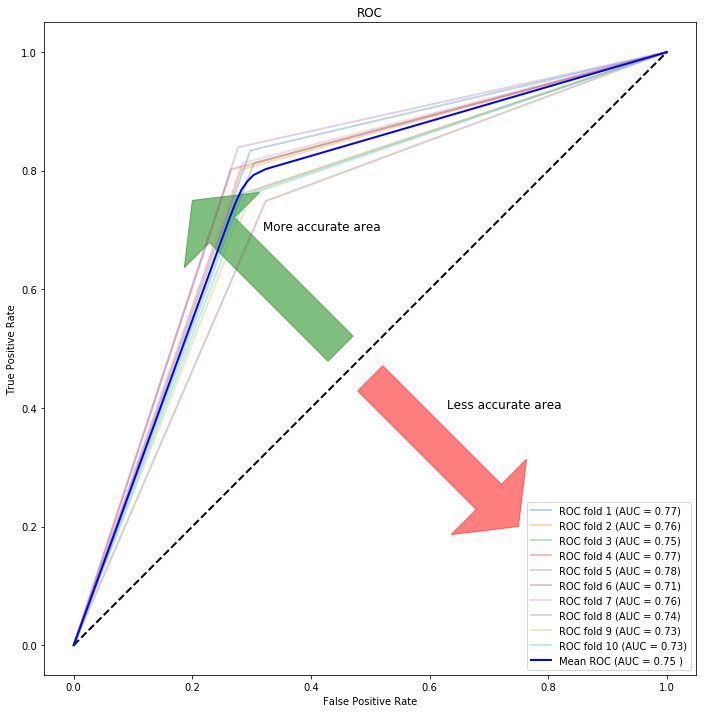

In [36]:
print ('\t\t-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
gnb=GaussianNB()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    gnb_kf=gnb.fit(X.iloc[train_index],Y[train_index])
    pred=gnb_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------SVM_WO_Feature_selection_(HO)----------------



              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1038
           1       0.68      0.45      0.54       369

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



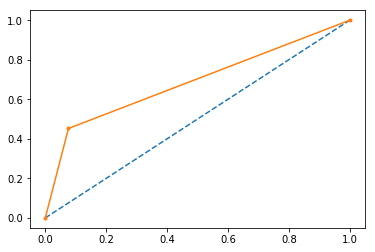

AUC: 0.688


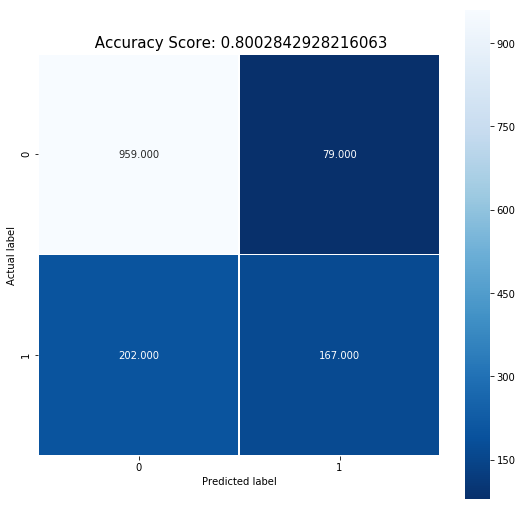

In [37]:
print ('\t\t-------------------SVM_WO_Feature_selection_(HO)----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(random_state=0)
'''SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)'''
                         


m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

		-------------------SVM_WO_Feature_selection_(HO){After Tuning}----------------



              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1038
           1       0.64      0.53      0.58       369

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



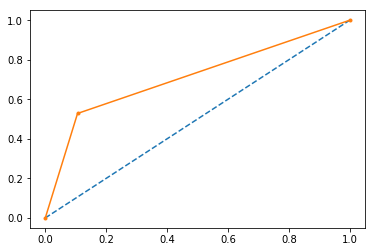

AUC: 0.711


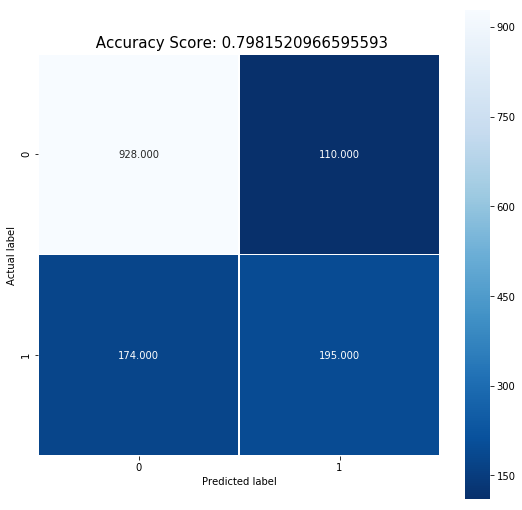

In [38]:
print ('\t\t-------------------SVM_WO_Feature_selection_(HO){After Tuning}----------------\n\n\n')
from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.04, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

roc_plot(m,x_test,y_test,predictions)

		-------------------SVM_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  2 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  3 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  4 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  5 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  6 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  7 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  8 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  9 is 0.5 and tpr is [0. 1.]
 ROC_AUC FOR FOLD  10 is 0.5 and tpr is [0. 1.]


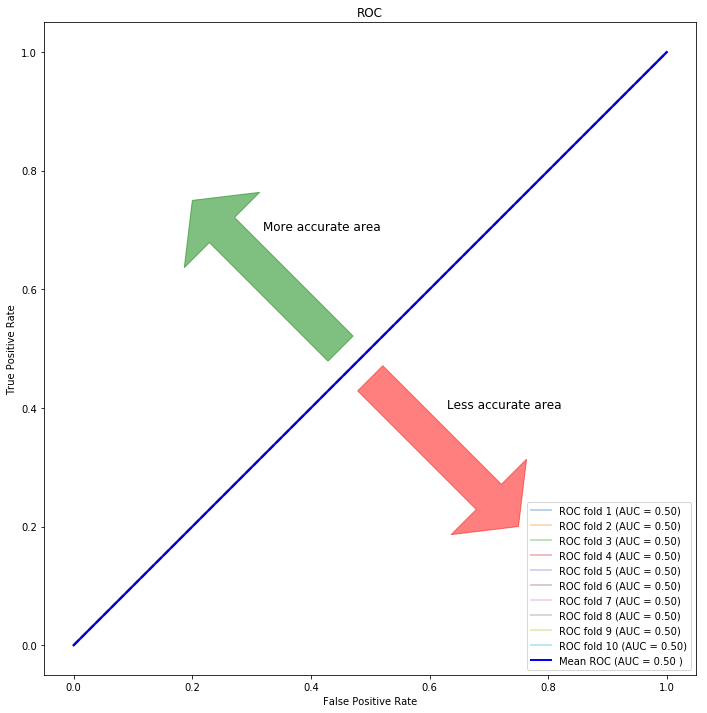

In [39]:
print ('\t\t-------------------SVM_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.svm import SVC
import matplotlib.patches as patches
import matplotlib.pylab as plt
skf = StratifiedKFold(n_splits=10)
svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
skf = StratifiedKFold(n_splits=10)

print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    svm_kf=svm.fit(X.iloc[train_index],Y[train_index])
    pred=svm_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_HO}--------------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.61      0.51      0.55       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



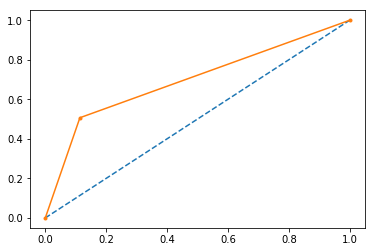

AUC: 0.697


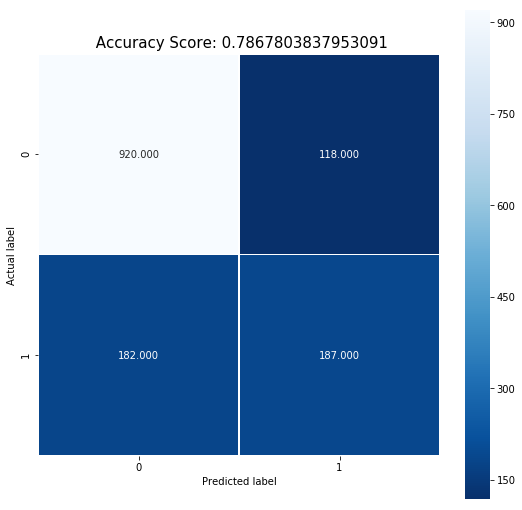

In [40]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_HO}--------------------""")

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

clf_gini = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
predictions=clf_gini.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(clf_gini,x_test,y_test,predictions)

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7300603026510412 and tpr is [0.         0.59358289 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7454204118784844 and tpr is [0.         0.64171123 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7293776311298213 and tpr is [0.         0.60962567 1.        ]
 ROC_AUC FOR FOLD  4 is 0.756902126601169 and tpr is [0.         0.64171123 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6910261990631348 and tpr is [0.         0.50802139 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6980785971894042 and tpr is [0.         0.52406417 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7318326907930192 and tpr is [0.         0.57219251 1.        ]
 ROC_AUC FOR FOLD  8 is 0.7075716121543755 and tpr is [0.         0.55080214 1.        ]
 ROC_AUC FOR FOLD  9 is 0.6973427848940844 and tpr is [0.         0.51871658 1.        ]
 ROC_AUC FOR FOLD  10 is 0.6932670667666918 and tpr is [0.         0.48924731 1

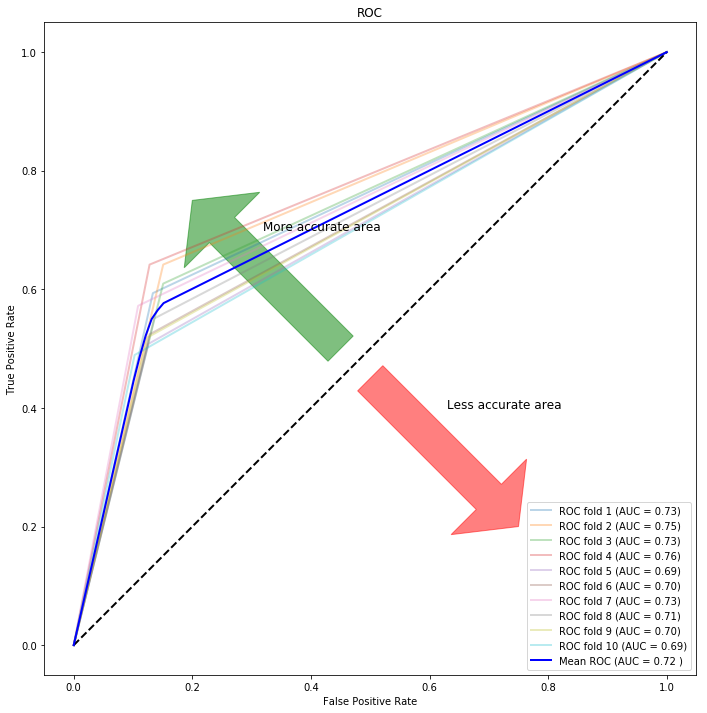

In [41]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------""")
import matplotlib.patches as patches
import matplotlib.pylab as plt

clf_gini = DecisionTreeClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_gini_kf=clf_gini.fit(X.iloc[train_index],Y[train_index])
    pred=clf_gini.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{RandomForest_HO}--------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.64      0.50      0.56       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



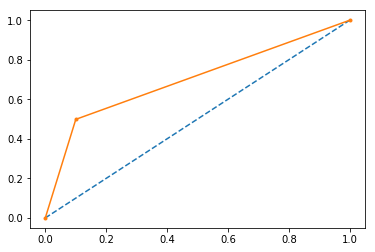

AUC: 0.699


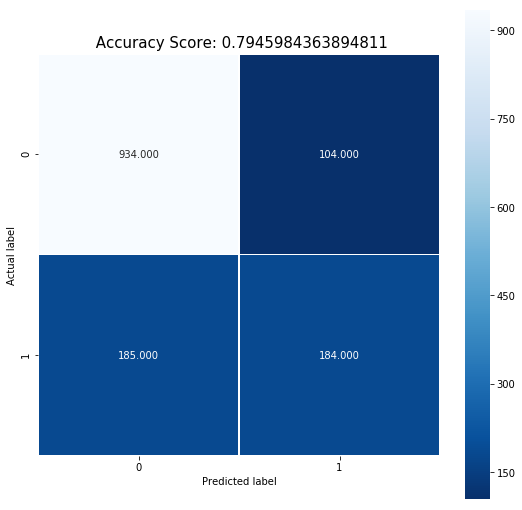

In [42]:
print("""--------------(MODELING PHASE)--{RandomForest_HO}--------------------""")
from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=75)
m=Rf.fit(x_train,y_train)
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

roc_plot(m,x_test,y_test,predictions)

<--------------------------------------K-fold RANDOM FOREST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.709295710547275 and tpr is [0.         0.51336898 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7187393332574809 and tpr is [0.         0.51871658 1.        ]
 ROC_AUC FOR FOLD  3 is 0.6986005233814996 and tpr is [0.         0.49197861 1.        ]
 ROC_AUC FOR FOLD  4 is 0.6987781370476309 and tpr is [0.         0.50802139 1.        ]
 ROC_AUC FOR FOLD  5 is 0.6695995522944908 and tpr is [0.         0.44385027 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6502197073332504 and tpr is [0.         0.44385027 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7223034033909547 and tpr is [0.         0.52406417 1.        ]
 ROC_AUC FOR FOLD  8 is 0.6931610910749078 and tpr is [0.         0.48128342 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7019182937445592 and tpr is [0.        0.5026738 1.       ]
 ROC_AUC FOR FOLD  10 is 0.7029569892473118 and tpr is [0.         0.48924731 1.        

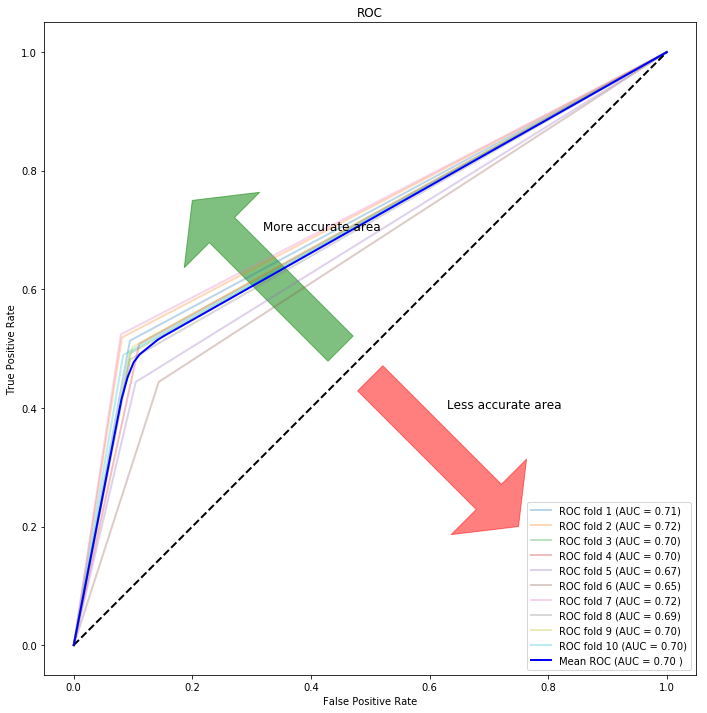

In [43]:
print("<--------------------------------------K-fold RANDOM FOREST------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=150)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=model.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------KNN_HO------------------------------------->
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1038
           1       0.62      0.57      0.59       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



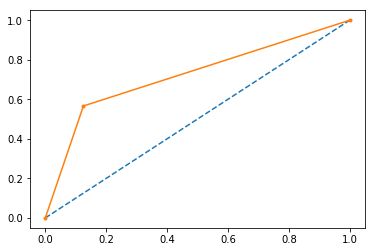

AUC: 0.721


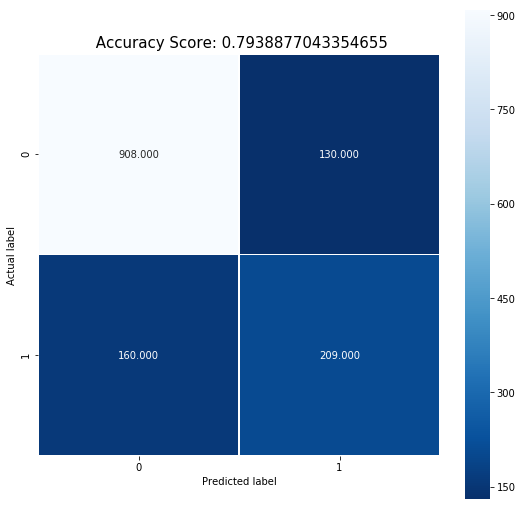

In [44]:
print("<--------------------------------------KNN_HO------------------------------------->")
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=100)
m=KN.fit(x_train,y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

<--------------------------------------KNN_KF------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6316418250085334
 ROC_AUC FOR FOLD  2 is 0.6173057230629196
 ROC_AUC FOR FOLD  3 is 0.623165320286722
 ROC_AUC FOR FOLD  4 is 0.6199633130207685
 ROC_AUC FOR FOLD  5 is 0.6226008373751192
 ROC_AUC FOR FOLD  6 is 0.6211654852215728
 ROC_AUC FOR FOLD  7 is 0.6475977283090826
 ROC_AUC FOR FOLD  8 is 0.6096982133233844
 ROC_AUC FOR FOLD  9 is 0.6367056336276583
 ROC_AUC FOR FOLD  10 is 0.6457864466116529


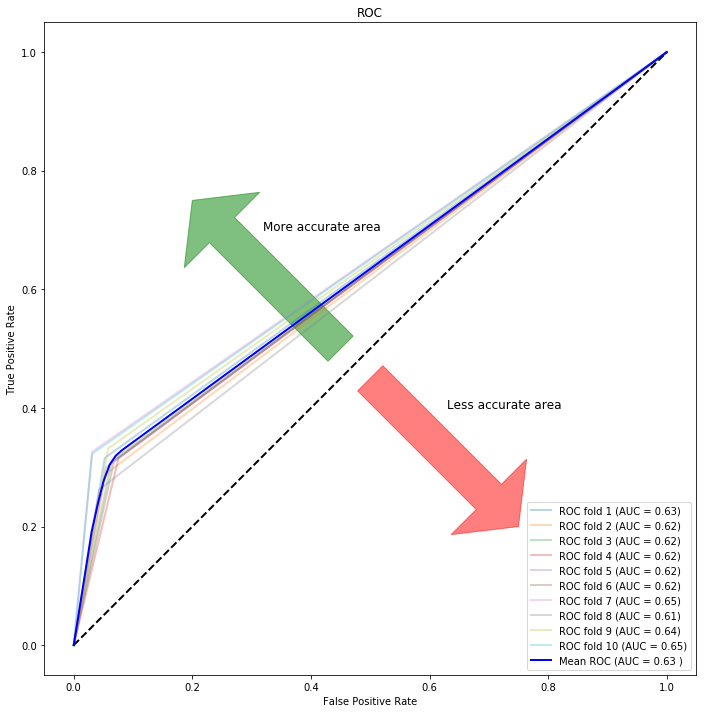

In [45]:
print("<--------------------------------------KNN_KF------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
KN=KNeighborsClassifier(n_neighbors=70)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=KN.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------XG-BOOST------------------------------------->
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.52      0.59       369

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



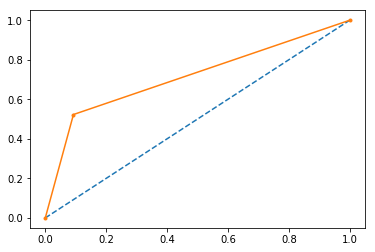

AUC: 0.715


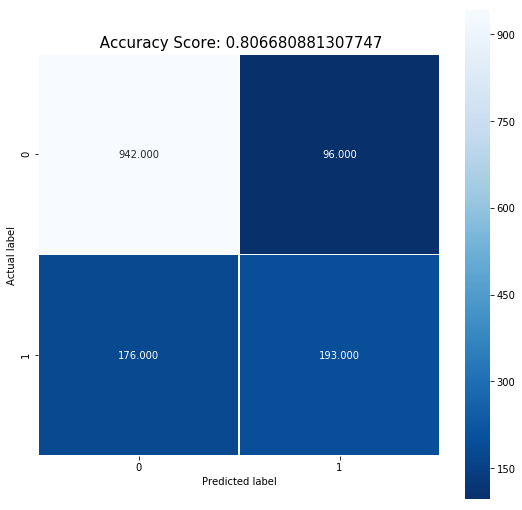

In [46]:
print("<--------------------------------------XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(x_train,y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

<--------------------------------------K-fold XG-BOOST------------------------------------->
Using  10  folds


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields TotalCharges

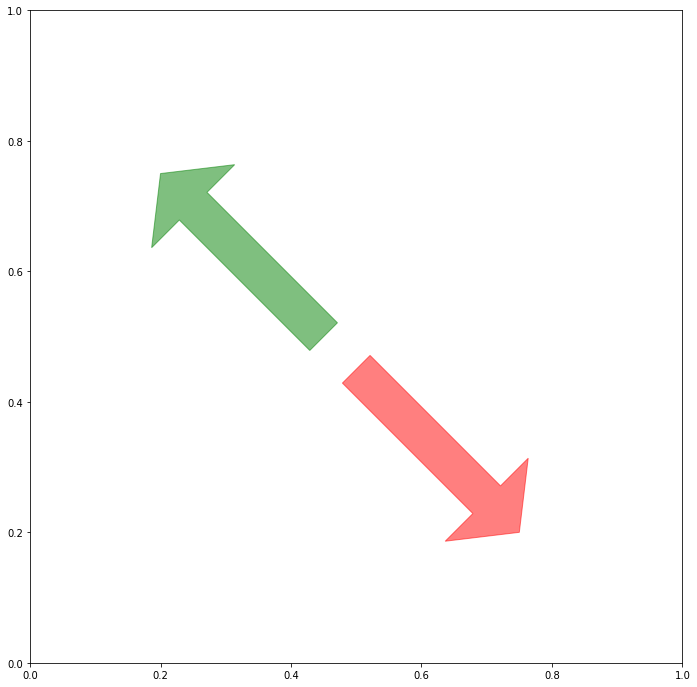

In [47]:
print("<--------------------------------------K-fold XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_kf, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [ ]:
X.head(5)

In [ ]:
print("<--------------------------------------K-fold MLP------------------------------------->")
skf = StratifiedKFold(n_splits=10)
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
print("Using ",skf.get_n_splits(x_kf, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=mlp.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()